# CNN 1 (Schraubenköpfe)

In [2]:
import numpy as np
from numpy import load
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


## Datensatz laden

````{toggle}
```python

X_train = load('Dataset/X_train.npy').astype(np.float32).reshape(-1, 28,28,1)
y_train = load('Dataset/y_train.npy')

X_test=load('Dataset/X_test.npy').astype(np.float32).reshape(-1,28,28,1)
y_test=load('Dataset/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```
````

In [3]:
X_train = load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32)
y_train=load('../01_Dataset/dataset_28x28/y_train.npy').astype(np.int32)
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) 
y_test=load('../01_Dataset/dataset_28x28/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
y_train.shape

(6421, 28, 28, 1)


(6421, 5)

In [4]:
print(y_train[0])
print(X_train[0].shape)

[0. 0. 0. 0. 1.]
(28, 28, 1)


[0. 0. 0. 0. 1.]


<function matplotlib.pyplot.show(close=None, block=None)>

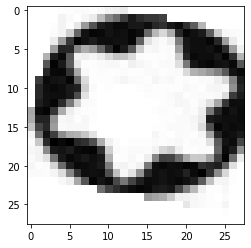

In [5]:
# label check
import matplotlib.pyplot as plt
i=0
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')
plt.show
# 0: innensechskant
# 1: philips
# 2: pozidriv
# 3: sechskant
# 4: torx

## Modell trainieren

In [6]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1,)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(5, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=100)

Epoch 1/15
65/65 [==============================] - 4s 63ms/step - loss: 8.6403 - accuracy: 0.7234
Epoch 2/15
65/65 [==============================] - 4s 59ms/step - loss: 0.2317 - accuracy: 0.9301
Epoch 3/15
65/65 [==============================] - 4s 59ms/step - loss: 0.0792 - accuracy: 0.9812
Epoch 4/15
65/65 [==============================] - 4s 58ms/step - loss: 0.0677 - accuracy: 0.9866
Epoch 5/15
65/65 [==============================] - 4s 62ms/step - loss: 0.0591 - accuracy: 0.9896
Epoch 6/15
65/65 [==============================] - 4s 60ms/step - loss: 0.0171 - accuracy: 0.9956
Epoch 7/15
65/65 [==============================] - 4s 58ms/step - loss: 0.0443 - accuracy: 0.9883
Epoch 8/15
65/65 [==============================] - 4s 59ms/step - loss: 0.0065 - accuracy: 0.9972
Epoch 9/15
65/65 [==============================] - 4s 59ms/step - loss: 0.0141 - accuracy: 0.9970
Epoch 10/15
65/65 [==============================] - 4s 59ms/step - loss: 0.0156 - accuracy: 0.9956
Epoch 11/

## Auswertung

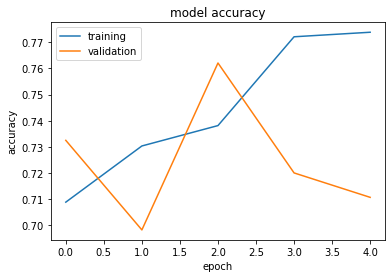

Test loss: 0.685
Test accuracy: 0.722


In [9]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

```{toggle}
```python
import keras
from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist,load_data()
print("Training label shape: ", y_train,shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras,utils,to_categorical(y_train, num_classes)
y_test = keras,utils,to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

# This is the one-hot version of: [5, 0, 4, 1, 9]
"""
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
"""
```
```

In [10]:
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 5 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 25,285
Trainable params: 25,285
Non-trainable params: 0
_________________________________________________________________


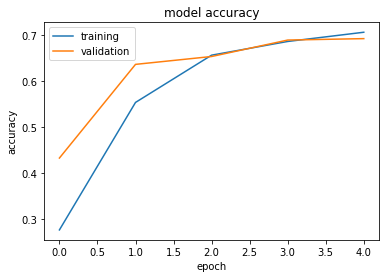

Test loss: 1.03
Test accuracy: 0.706


In [11]:

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,784), y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(X_test.reshape(-1,784), y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

```{toggle}
```python
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=15):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
```
```